In [1]:
import cv2
import numpy as np
import random
import os
import math
import matplotlib.pyplot as plt
imgsPath='imgs'

imgs=[]
edges_imgs=[]
#Reading and Adding images
for path in os.listdir(imgsPath):
    print(os.path.join(imgsPath,path))

    img=cv2.imread(os.path.join(imgsPath,path))
    
    arrayTemp=np.array(img.shape[:-1])*0.4

    W,H=int(arrayTemp[0]),int(arrayTemp[1])

    img=cv2.resize(img,(H,W))

    # 1. Convert to gray & denoise
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # 2. Outline extraction with Canny
    edges = cv2.Canny(blur, 10, 200)

    imgs.append(img)
    edges_imgs.append(edges)


imgs\1.jpg
imgs\2.jpg
imgs\3.jpg
imgs\4.jpg
imgs\5.jpg
imgs\6.jpg


In [2]:
def convertCoordinates(rho,theta):
    x0=rho*np.cos(theta)
    y0=rho*np.sin(theta)

    a=np.cos(theta)
    b=np.sin(theta)

    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))

    return (x1,y1),(x2,y2)

def convertDegree(thetas):
    alpha=thetas - np.pi/2
    return np.abs(np.degrees(alpha))

# Draw function and log function (For detailing)
def draw(img,lines):
    colors=[(random.randint(10,255),random.randint(20,255),random.randint(30,255)) for i in range(len(lines))]
    img_c=img.copy()

    for i in range(len(lines)):
        rho=lines[i][0][0]
        theta=lines[i][0][1]

        (x1,y1),(x2,y2)=convertCoordinates(rho,theta)

        print(f"p: {rho}; theta: {theta}")
        cv2.line(img_c,(x1,y1),(x2,y2),colors[i],5)
        plt.imshow(img_c)
        plt.show()

Showing the last test images 

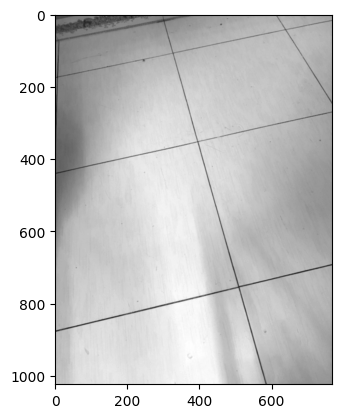

In [3]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(blur)
plt.show()

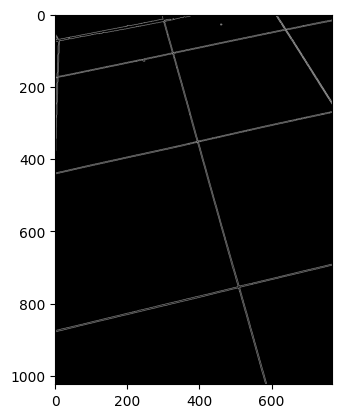

In [4]:
plt.imshow(edges)

In [5]:
lines_imgs=[]
countFails=0
path='results/Temp'
edges_imgs_=edges_imgs.copy()
for pos,edges in enumerate(edges_imgs_):
    lines=[]
    lines=cv2.HoughLines(edges, 1,np.pi/180,240)
    if lines is None:
        print(f"Can't find lines of image number {pos+1}")
        print('Image Error: ')
        plt.imshow(imgs[pos])
        countFails+=1

    img=imgs[pos]

    if lines is not None:

        lines_imgs.append(lines)
        img_c=img.copy()
        
        for i in range(len(lines)):
            rho=lines[i][0][0]
            theta=lines[i][0][1]

            x0=rho*np.cos(theta)
            y0=rho*np.sin(theta)

            a=np.cos(theta)
            b=np.sin(theta)

            x1=int(x0+1000*(-b))
            y1=int(y0+1000*(a))
            x2=int(x0-1000*(-b))
            y2=int(y0-1000*(a))

            cv2.line(img_c,(x1,y1),(x2,y2),(255,0,0),2)

        print(f'Saved result of image {pos+1} at {path}/{pos+1}.jpg')
        cv2.imwrite(f'{path}/{pos+1}.jpg',img_c)


if countFails: print(f'There are {countFails} images failed!')
else: print('All passed!')

Saved result of image 1 at results/Temp/1.jpg
Saved result of image 2 at results/Temp/2.jpg
Saved result of image 3 at results/Temp/3.jpg
Saved result of image 4 at results/Temp/4.jpg
Saved result of image 5 at results/Temp/5.jpg
Saved result of image 6 at results/Temp/6.jpg
All passed!


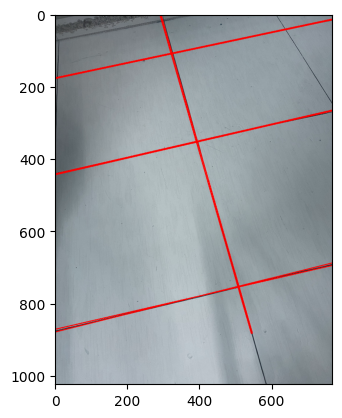

In [6]:
plt.imshow(img_c)

In [7]:
lines_filtered_imgs=[]
for pos,lines in enumerate(lines_imgs):
    
    print(f"\n---------------Img {pos+1}---------------\n")    
    
    lines_filtered=[]
    visited=[]
    angleBias=0.3
    p_bias=20

    for i in range(len(lines)-1):
        lines_=[]
        check=False
        
        if list(lines[i][0]) in visited: continue

        for j in range(i,len(lines)):
            c=False

            angleD=np.abs(lines[i][0][1]-lines[j][0][1])
            pD=np.abs(lines[i][0][0]-lines[j][0][0])

            print(f'\nFirst line: {lines[i]}; Second line: {lines[j]}; Difference:\nAngle: {angleD}\nLine: {pD}\nCond:',end=' ')

            if angleD<angleBias and pD<p_bias:
            
                print('Take')
            
                lines_.append(lines[i])
                lines_.append(lines[j])
                visited.append(list(lines[i][0]))
                visited.append(list(lines[j][0]))

                check=True
                c=True
                
            if not c:
            
                print('Pass')

        
        print('---Take and Average Process---')
        
        if not check:
            print(f'Not average; Value: {lines[i]}')
            
            lines_filtered.append(lines[i])
            visited.append(list(lines[i][0]))
            
            print(f'Visited: {visited}')
            print('-----------------------------')
        
        else:
            print(f'Average; value need to average {lines_}')
            print(f'Values: {np.mean(lines_,axis=0)}')
            
            lines_filtered.append(np.mean(lines_,axis=0))
            
            print(f'Visited: {visited}')
            print('-----------------------------')
    print(f'Result: {lines_filtered}')
    lines_filtered_imgs.append(lines_filtered)


---------------Img 1---------------


First line: [[943.          1.5707964]]; Second line: [[943.          1.5707964]]; Difference:
Angle: 0.0
Line: 0.0
Cond: Take

First line: [[943.          1.5707964]]; Second line: [[940.          1.5707964]]; Difference:
Angle: 0.0
Line: 3.0
Cond: Take

First line: [[943.          1.5707964]]; Second line: [[-384.           2.7750735]]; Difference:
Angle: 1.2042771577835083
Line: 1327.0
Cond: Pass

First line: [[943.          1.5707964]]; Second line: [[330.           0.36651915]]; Difference:
Angle: 1.2042772769927979
Line: 613.0
Cond: Pass

First line: [[943.          1.5707964]]; Second line: [[385.   0.]]; Difference:
Angle: 1.5707963705062866
Line: 558.0
Cond: Pass

First line: [[943.          1.5707964]]; Second line: [[333.           0.36651915]]; Difference:
Angle: 1.2042772769927979
Line: 610.0
Cond: Pass

First line: [[943.          1.5707964]]; Second line: [[-381.           2.7750735]]; Difference:
Angle: 1.2042771577835083
Line: 132

In [8]:
countFails=0
path='results/Temp2'
colors_imgs=[]

for pos,lines_filtered in enumerate(lines_filtered_imgs):

    img=imgs[pos]

    if lines_filtered is not None:

        colors=[(random.randint(10,255),random.randint(20,255),random.randint(30,255)) for i in range(len(lines_filtered))]
        img_c=img.copy()

        for i in range(len(lines_filtered)):
            rho=lines_filtered[i][0][0]
            theta=lines_filtered[i][0][1]

            x0=rho*np.cos(theta)
            y0=rho*np.sin(theta)

            a=np.cos(theta)
            b=np.sin(theta)

            x1=int(x0+1000*(-b))
            y1=int(y0+1000*(a))
            x2=int(x0-1000*(-b))
            y2=int(y0-1000*(a))
            cv2.line(img_c,(x1,y1),(x2,y2),colors[i],5)

        colors_imgs.append(colors)
        print(f'Saved result of image {pos+1} at {path}/{pos+1}.jpg')
        cv2.imwrite(f'{path}/{pos+1}.jpg',img_c)

if countFails: print(f'There are {countFails} images failed!')
else: print('All passed!')

Saved result of image 1 at results/Temp2/1.jpg
Saved result of image 2 at results/Temp2/2.jpg
Saved result of image 3 at results/Temp2/3.jpg
Saved result of image 4 at results/Temp2/4.jpg
Saved result of image 5 at results/Temp2/5.jpg
Saved result of image 6 at results/Temp2/6.jpg
All passed!


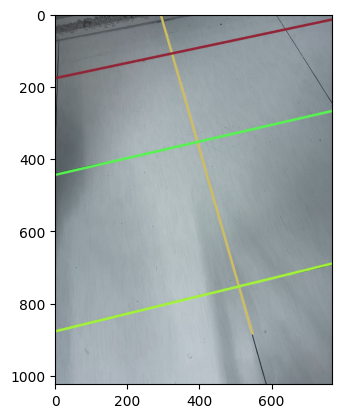

In [9]:
lines_filtered=lines_filtered_imgs[-1]
img=imgs[-1]
if lines_filtered is not None:

    colors=[(random.randint(10,255),random.randint(20,255),random.randint(30,255)) for i in range(len(lines_filtered))]
    img_c=img.copy()

    for i in range(len(lines_filtered)):
        rho=lines_filtered[i][0][0]
        theta=lines_filtered[i][0][1]

        x0=rho*np.cos(theta)
        y0=rho*np.sin(theta)

        a=np.cos(theta)
        b=np.sin(theta)

        x1=int(x0+1000*(-b))
        y1=int(y0+1000*(a))
        x2=int(x0-1000*(-b))
        y2=int(y0-1000*(a))
        cv2.line(img_c,(x1,y1),(x2,y2),colors[i],5)
    plt.imshow(img_c)

Getting the direction

Calcualte angle of the last line (Take for example)

In [10]:
taken_line=lines_filtered_imgs[-3]
taken_img=imgs[-3].copy()
taken_line=np.array(taken_line).reshape(len(taken_line),2)

In [11]:
taken_line

array([[ 6.6225000e+02,  1.5707964e+00],
       [ 3.5475000e+02,  8.7266460e-02],
       [-4.2450000e+02,  2.9146998e+00],
       [ 4.6850000e+02,  1.5707964e+00],
       [ 2.2100000e+02,  4.3633232e-01],
       [ 1.0035000e+03,  1.5577065e+00],
       [-4.6300000e+02,  2.6529005e+00]], dtype=float32)

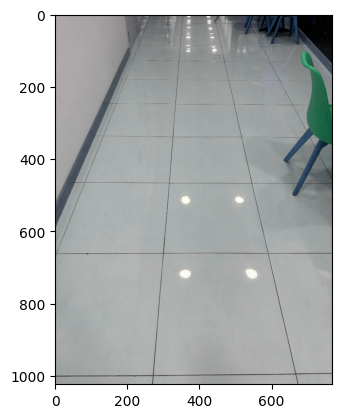

In [12]:
plt.imshow(taken_img)

p: 662.25; theta: 1.5707963705062866


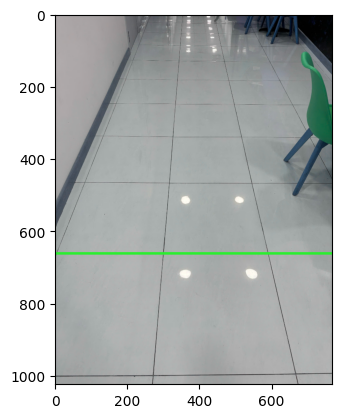

p: 354.75; theta: 0.0872664600610733


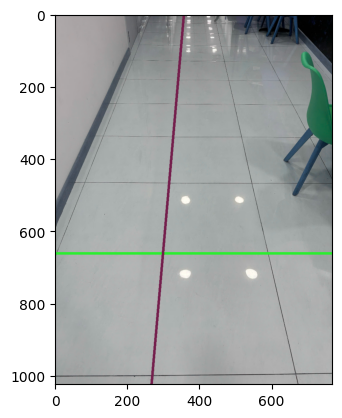

p: -424.5; theta: 2.9146997928619385


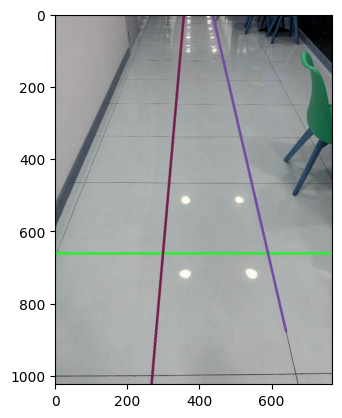

p: 468.5; theta: 1.5707963705062866


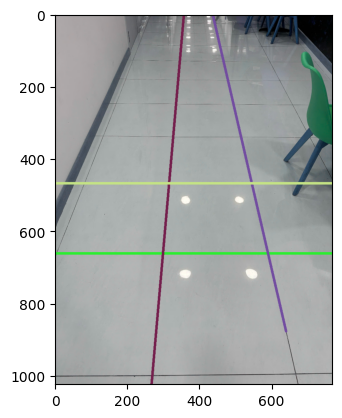

p: 221.0; theta: 0.4363323152065277


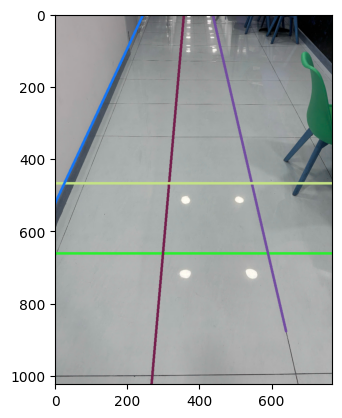

p: 1003.5; theta: 1.5577064752578735


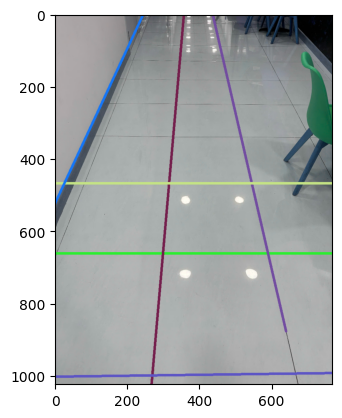

p: -463.0; theta: 2.652900457382202


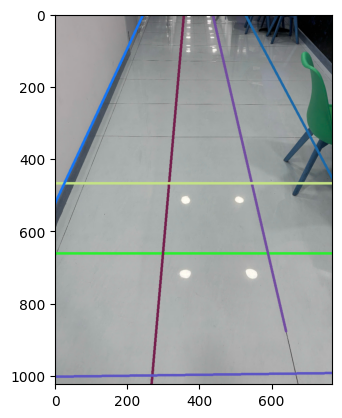

In [13]:
draw(taken_img,taken_line.reshape(len(taken_line),1,2))

In [ ]:
H,W=taken_img.shape[:-1]
thetas=taken_line[:,1]
rhos=taken_line[:,0]
lines_index=np.array(range(len(rhos)))

In [121]:
# Calculate the intercepts of x_axis and y_axis of each lines to determnine delta_x and delta_y for arctan2 formula
# x_intercept=p/cos(theta) ; y_intercept=p/sin(theta)
# 2 coordinates from x_axis and y_axis intercepts; x_axis_intercept => (x_intercept,0) ; y_axis_intercept => (0,y_intercept)
x_intercepts=rhos/np.cos(thetas)

x_intercepts_f=x_intercepts[np.logical_and(x_intercepts<=W, x_intercepts>=0)]
rhos_f=rhos[np.logical_and(x_intercepts<=W, x_intercepts>=0)]
lines_index_f=lines_index[np.logical_and(x_intercepts<=W, x_intercepts>=0)]

#Filtered lines with the same direction (positive rho or negative rho); 
# with positive rho for left and negative for right, respectively.
rhos_f_l=rhos_f[rhos_f>0]
rhos_f_r=rhos_f[rhos_f<0]

left_lines=lines_index_f[rhos_f>0]
right_lines=lines_index_f[rhos_f<0]

#Left lines calculate delta_y
delta_y_l=x_intercepts_f[rhos_f>0]/np.tan(thetas[left_lines])

#Right lines calculate delta_y
delta_y_r=(W-x_intercepts_f[rhos_f<0])/np.tan(2*np.pi-thetas[right_lines])

In [153]:
# Calculate startpoints and endpoints
#
#
end_points_l=[]
start_points_l=[(x_,0) for x_ in x_intercepts_f[rhos_f>0]]

end_points_r=[]
start_points_r=[(x_,0) for x_ in x_intercepts_f[rhos_f<0]]


for i,delta_y in enumerate(delta_y_l):
    if delta_y<=H:
        end_points_l.append((0,rhos_f_l[i]/np.sin(thetas[left_lines[i]])))
        continue
    end_points_l.append((rhos_f_l[i]-H*np.sin(thetas[left_lines[i]])/np.cos(thetas[left_lines[i]]),H))

for i,delta_y in enumerate(delta_y_r):
    if delta_y<=H:
        end_points_r.append((W,(rhos_f_r[i]-W*np.cos(thetas[right_lines[i]]))/np.sin(thetas[right_lines[i]])))
        continue
    end_points_r.append(((rhos_f_r[i]-H*np.sin(thetas[right_lines[i]]))/np.cos(thetas[right_lines[i]]),H))


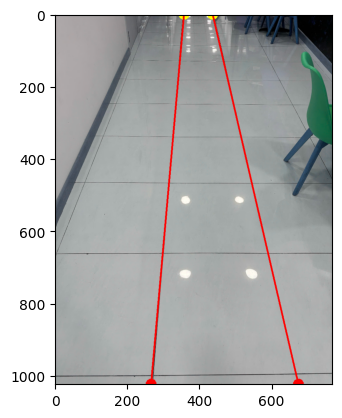

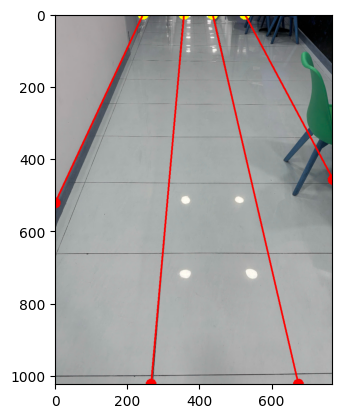

In [154]:
img_c=taken_img.copy()
for i in range(len(start_points_l)):
    cv2.circle(img_c,(int(end_points_l[i][0]),int(end_points_l[i][1])),5,(255,0,0),20)
    cv2.circle(img_c,(int(start_points_l[i][0]),int(start_points_l[i][1])),5,(255,255,0),20)
    
    cv2.circle(img_c,(int(end_points_r[i][0]),int(end_points_r[i][1])),5,(255,0,0),20)
    cv2.circle(img_c,(int(start_points_r[i][0]),int(start_points_r[i][1])),5,(255,255,0),20)

    cv2.line(img_c,(int(start_points_l[i][0]),int(start_points_l[i][1])),(int(end_points_l[i][0]),int(end_points_l[i][1])),(255,0,0),3)
    cv2.line(img_c,(int(start_points_r[i][0]),int(start_points_r[i][1])),(int(end_points_r[i][0]),int(end_points_r[i][1])),(255,0,0),3)

    plt.imshow(img_c)
    plt.show()

Actual INFS: theta: p: 384; theta: -0.30979594222899354
Corrected INFS: theta: p: 384; theta: 0


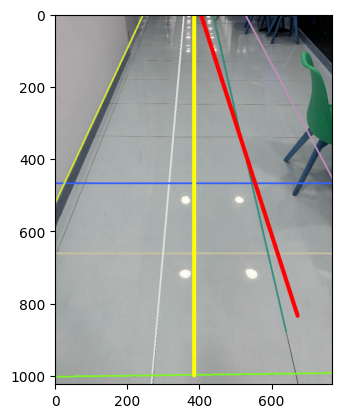

In [ ]:
colors=[(random.randint(10,255),random.randint(20,255),random.randint(30,255)) for i in range(len(taken_line))]
img_c=taken_img.copy()

for i in range(len(taken_line)):
    rho=taken_line[i][0]
    theta=taken_line[i][1]
    (x1,y1),(x2,y2)=convertCoordinates(rho,theta)
    cv2.line(img_c,(x1,y1),(x2,y2),colors[i],3)

# Draw the actual and corrected lines

rho_base=taken_img.shape[:-1][1]//2 #Setting the p value to be the center of x-axis

# Actual
(x1,y1),(x2,y2)=convertCoordinates(rho_base,actualTheta)
cv2.line(img_c,(x1,y1),(x2,y2),(255,0,0),10) #RED

# Corrected
(x1,y1),(x2,y2)=convertCoordinates(rho_base,correctedTheta)
cv2.line(img_c,(x1,y1),(x2,y2),(255,255,0),10) #YELLOW

print(f'Actual INFS: theta: p: {rho_base}; theta: {actualTheta}')
print(f'Corrected INFS: theta: p: {rho_base}; theta: {correctedTheta}')

plt.imshow(img_c)
plt.show()

Apply to camera first to see the differences

Next task: calculate the avg line (done), avg left and avg right angles. Furthermore, find way to display the angles in opencv.